In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
pd.set_option('display.max_rows', None)  

# Evaluated $B(E3; 3_{1}^-\rightarrow 0_{1}^+)$ Strengths

In [2]:
# Weisskopf unit
def BEWU(L,A):
    return (1.2)**(2*L)/(4*np.pi)*(3/(3+L))**2*A**(2*L/3)

In [3]:
# From evaluated ENSDF
BE3 = pd.read_csv("BE3_EvenEven.csv")
BE3

,z,n,BE3,BE3unc,E_i,E_f,Comments
0,6,6,12,2,9641,0,There is another 3 to 0 decay but from a higher 3
1,6,8,2.4,0.3,6728.2,0,NaN
2,8,8,13.5,0.7,6129.89,0,NaN
3,10,10,11,4,5621.4,0,NaN
4,12,12,5.6,1.1–0.8,7616.41,0,There is another 3 to 0 decay but from a higher 3
5,14,14,13.2,1.5,6878.79,0,NaN
6,16,16,16,3,5006.2,0,Reported value of upwards transition as 0.0127...
7,16,18,18,5,4624.404,0,Reported value of upwards transition as 0.008(2)
8,16,20,15.4,1.5,4192.7,0,Unclear value of in 3- level 0.008(3). The ref...
9,18,18,20.6,2,4178.32,0,NaN


In [4]:
s = "Reported value of upwards transition as "

# Columns to store the computed values from inverse transition
BE3["Computed"] = np.nan
BE3["ComputedErr"] = np.nan

for i in range(len(BE3)):
    if s in str(BE3["Comments"].iloc[i]):
        
        value = str(BE3["Comments"].iloc[i]).split("as ")[1].split("(")
        
        # Extract measure of 0 -> 3
        measurestr = value[0]
        errorcorrec = len(measurestr.split(".")[1])
        
        # Convert to numbers
        measure = float(measurestr)
        error = float(value[1][:-1])*10**(-1*errorcorrec) if len(value)==2 else 0
        
        # Convert to 3->0 and convert to W.u.
        measureInWU = measure*10**6/BEWU(3, float(BE3["z"].iloc[i])+float(BE3["n"].iloc[i]))/7
        errorInWU = error*10**6/BEWU(3, float(BE3["z"].iloc[i])+float(BE3["n"].iloc[i]))/7
        
        #print(value, "---", measure, "---", error, "---", measureInWU, "---", errorInWU)
        
        # Append the values
        BE3["Computed"].iloc[i] = measureInWU
        BE3["ComputedErr"].iloc[i] = errorInWU

# Drop two rows
BE3 = BE3[(BE3["BE3"] != "<300") & (BE3["BE3"] != ">7.1")]
BE3 = BE3[(BE3["n"] != ".") & (BE3["z"] != ".")]
BE3

/tmp/ipykernel_5339/3424311851.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BE3["Computed"].iloc[i] = measureInWU
/tmp/ipykernel_5339/3424311851.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BE3["ComputedErr"].iloc[i] = errorInWU


,z,n,BE3,BE3unc,E_i,E_f,Comments,Computed,ComputedErr
0,6,6,12,2,9641,0,There is another 3 to 0 decay but from a higher 3,NaN,NaN
1,6,8,2.4,0.3,6728.2,0,NaN,NaN,NaN
2,8,8,13.5,0.7,6129.89,0,NaN,NaN,NaN
3,10,10,11,4,5621.4,0,NaN,NaN,NaN
4,12,12,5.6,1.1–0.8,7616.41,0,There is another 3 to 0 decay but from a higher 3,NaN,NaN
5,14,14,13.2,1.5,6878.79,0,NaN,NaN,NaN
6,16,16,16,3,5006.2,0,Reported value of upwards transition as 0.0127...,29.825525,4.696933
7,16,18,18,5,4624.404,0,Reported value of upwards transition as 0.008(2),16.642421,4.160605
8,16,20,15.4,1.5,4192.7,0,Unclear value of in 3- level 0.008(3). The ref...,NaN,NaN
9,18,18,20.6,2,4178.32,0,NaN,NaN,NaN


In [5]:
# Extract the data from experimental or computed
exp = []
expN = []
expZ = []
experr = []

com = []
comN = []
comZ = []
comerr = []

for i in range(len(BE3)):
    
    if BE3["BE3"].iloc[i] != ".":
        
        expN.append(float(BE3["n"].iloc[i]))
        expZ.append(float(BE3["z"].iloc[i]))
        exp.append(float(BE3["BE3"].iloc[i]))
        errorstr = BE3["BE3unc"].iloc[i]
        
        if len(errorstr.split("–")) == 2:
            experr.append([float(errorstr.split("–")[0]), float(errorstr.split("–")[1])])
        else:
            experr.append([float(errorstr), float(errorstr)])
            
    else:
        comN.append(float(BE3["n"].iloc[i]))
        comZ.append(float(BE3["z"].iloc[i]))
        com.append(BE3["Computed"].iloc[i])
        comerr.append([BE3["ComputedErr"].iloc[i], BE3["ComputedErr"].iloc[i]]) 

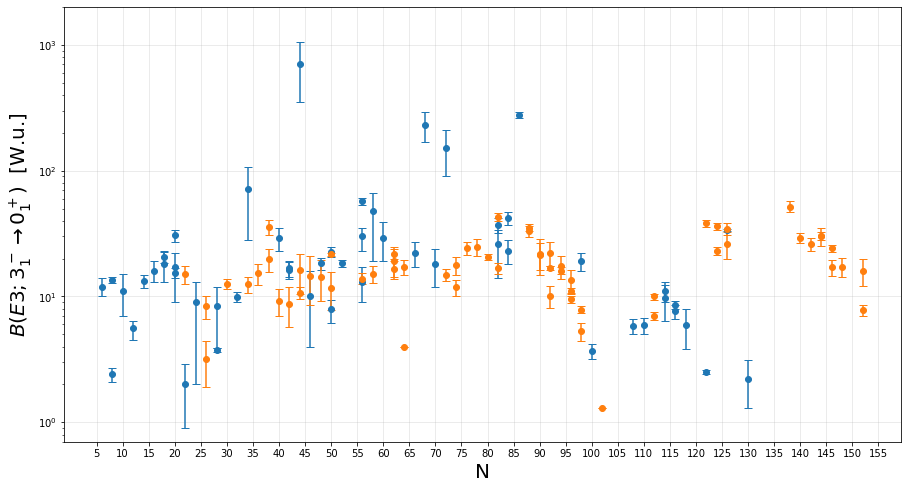

In [6]:
plt.figure(figsize=(15,8))
plt.errorbar(expN, exp, yerr=np.array(experr).T, fmt='o', ecolor = 'C0', capsize=4)
plt.errorbar(comN, com, yerr=np.array(comerr).T, fmt='o', color = 'C1', ecolor = 'C1', capsize=4)

plt.ylabel(r"$B(E3;3^-_{1}\rightarrow 0^+_{1})$  [W.u.]", fontsize=20)
plt.xlabel("N", fontsize=20)

plt.yscale("log")
plt.xticks(np.arange(5, 160, step=5))
plt.grid(alpha=0.3)
plt.ylim(0.7,2000)
plt.show()

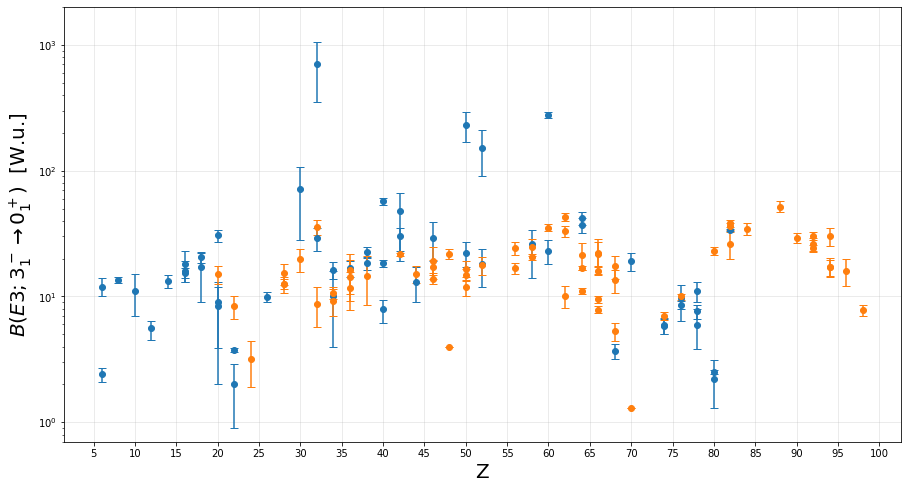

In [7]:
plt.figure(figsize=(15,8))
plt.errorbar(expZ, exp, yerr=np.array(experr).T, fmt='o', ecolor = 'C0', capsize=4)
plt.errorbar(comZ, com, yerr=np.array(comerr).T, fmt='o', color = 'C1', ecolor = 'C1', capsize=4)

plt.ylabel(r"$B(E3;3^-_{1}\rightarrow 0^+_{1})$  [W.u.]", fontsize=20)
plt.xlabel("Z", fontsize=20)

plt.yscale("log")
plt.xticks(np.arange(5, 105, step=5))
plt.grid(alpha=0.3)
plt.ylim(0.7,2000)
plt.show()

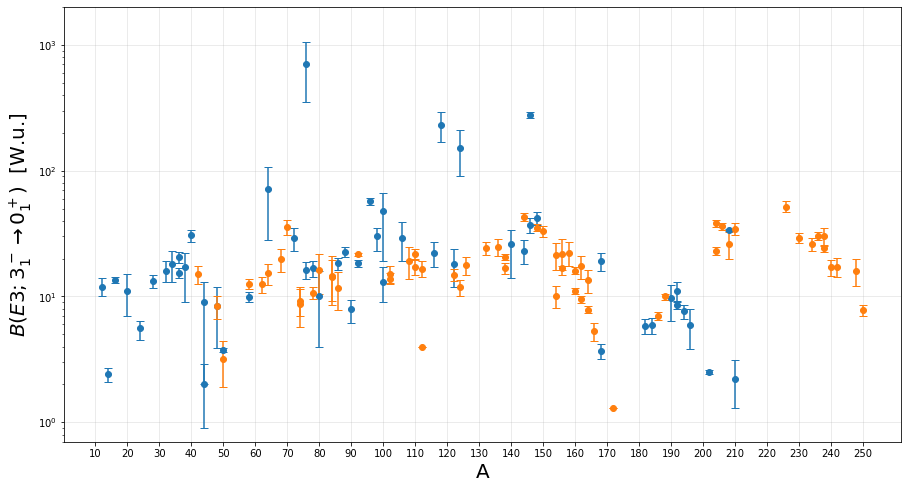

In [11]:
plt.figure(figsize=(15,8))
plt.errorbar(np.array(expZ)+np.array(expN), exp, yerr=np.array(experr).T, fmt='o', ecolor = 'C0', capsize=4)
plt.errorbar(np.array(comZ)+np.array(comN), com, yerr=np.array(comerr).T, fmt='o', color = 'C1', ecolor = 'C1', capsize=4)

plt.ylabel(r"$B(E3;3^-_{1}\rightarrow 0^+_{1})$  [W.u.]", fontsize=20)
plt.xlabel("A", fontsize=20)

plt.yscale("log")
plt.xticks(np.arange(10, 260, step=10))
plt.grid(alpha=0.3)
plt.ylim(0.7,2000)
plt.show()

# Values of  $E_{3_1^-}$ 

In [6]:
first3 = pd.read_csv("First_3_minus_EvenEven.csv")
first3["a"] = first3["n"] + first3["z"]

In [7]:
first3.sort_values(by=["firstThreeMinusEnergy(keV)"]).head(12)
# Lowest values: 224Ra, 224Th (Quartet), 226Th, 222Ra, 226Ra, 228Th, 230U, 222Th, 220Ra (Quartet), 228Ra, 230Th, 232Th

,z,n,firstThreeMinusEnergy(keV),a
298,88,136,290.352,224
296,90,134,305.300,224
299,90,136,307.500,226
295,88,134,317.290,222
301,88,138,321.540,226
302,90,138,396.094,228
303,92,138,435.190,230
293,90,132,467.000,222
292,88,132,474.170,220
304,88,140,537.500,228


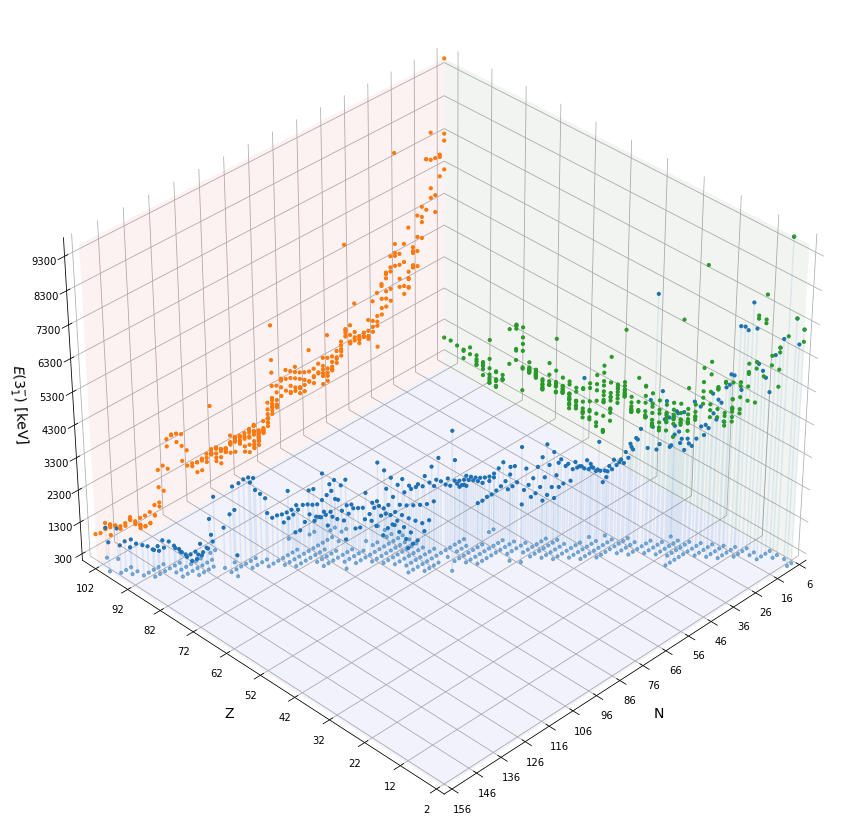

In [8]:

#%matplotlib notebook

# Data
N = first3["n"].to_numpy()
Z = first3["z"].to_numpy()
E = first3["firstThreeMinusEnergy(keV)"].to_numpy()
magic = [2, 8, 20, 28, 50, 82, 126]

# Canvas
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection ="3d")
 
#Plots
ax.scatter(N, Z, E, "o", s= 10, c = "C0", alpha=1)
ax.scatter(N, Z, 0, "o", s= 10, c = "C0", alpha=0.5)
ax.scatter(N, max(Z), E, "o", s= 10, c = "C1", alpha=1)
ax.scatter(min(N), Z, E, "o", s= 10, c = "C2", alpha=1)
for i in range(len(N)):
    ax.plot([N[i], N[i]], [Z[i], Z[i]], [E[i], 0], color='C0', alpha=0.1)  
#for i in range(len(magic)):
    #ax.plot([magic[i], magic[i]], [105, 105], [0, max(E)], color='C1', alpha=0.4)  
    #if i < len(magic)-1:
    #    ax.plot([0,0], [magic[i], magic[i]], [0, max(E)], color='C2', alpha=0.4)  

    
# Format the axis
ax.invert_xaxis()
ax.set_xlabel('N', fontsize=14, labelpad=10)
ax.set_ylabel('Z', fontsize=14, labelpad=10)
ax.set_zlabel(r'$E(3^{-}_1)$ [keV]', fontsize=14, labelpad=10, rotation=-180)
ax.view_init(35, -135) 
ax.set_xticks(np.arange(min(N), max(N)+10, 10))
ax.set_yticks(np.arange(min(Z), max(Z)+10, 10))
ax.set_zticks(np.arange(300, 9600, 1000))

# Plot the planes
X, Y = np.meshgrid(np.linspace(min(N), max(N), 10), np.linspace(min(Z), max(Z), 10))
Z_xy = np.zeros_like(X)
X_xz, Z_xz = np.meshgrid(np.linspace(min(N), max(N), 10), np.linspace(0, max(E), 10))
Y_xz = np.full((len(X_xz[0]), len(X_xz[0])), max(Z))
Y_yz, Z_yz = np.meshgrid(np.linspace(min(Z), max(Z), 10), np.linspace(0, max(E), 10))
X_yz = np.full((len(X_xz[0]), len(X_xz[0])), min(N))
ax.plot_surface(X, Y, Z_xy, color='blue', alpha=0.05, rstride=100, cstride=100)
ax.plot_surface(X_xz, Y_xz, Z_xz, color='red', alpha=0.05, rstride=100, cstride=100)
ax.plot_surface(X_yz, Y_yz, Z_yz, color='green', alpha=0.05, rstride=100, cstride=100)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Maximum values
ax.set_xlim(max(N), min(N))
ax.set_ylim(min(Z), max(Z))
ax.set_zlim(min(E), max(E))

plt.show()

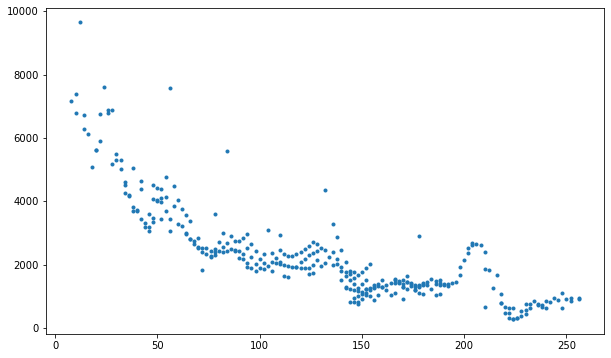

In [15]:
fig = plt.figure(figsize=(10,6))
plt.plot(first3["a"], first3["firstThreeMinusEnergy(keV)"], ".")
plt.show()

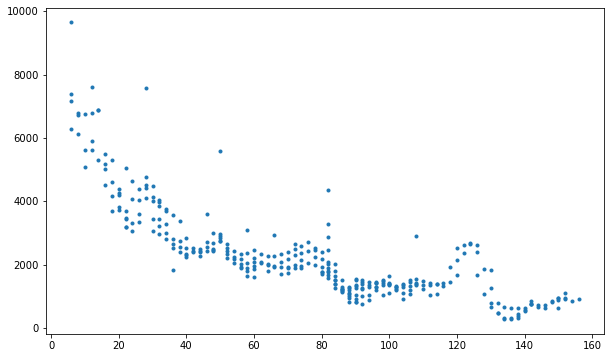

In [16]:
fig = plt.figure(figsize=(10,6))
plt.plot(first3["n"], first3["firstThreeMinusEnergy(keV)"], ".")
plt.show()

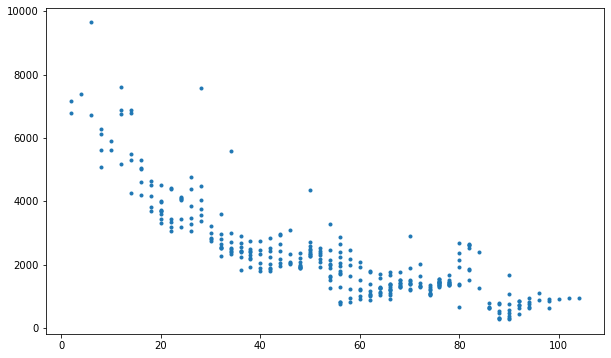

In [17]:
fig = plt.figure(figsize=(10,6))
plt.plot(first3["z"], first3["firstThreeMinusEnergy(keV)"], ".")
plt.show()